# Visualize Logistic Regression and Gradient Descent

Term 1 2020 - Instructor: Teerapong Leelanupab

Teaching Assistant: 
1. Tiwipab Meephruek (Mil)
2. Jiratkul Wangsiripaisarn (Brooklyn)
3. Hataichanok Sakkara (Pond)
***

## Import library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import imageio
from tqdm import tqdm

## Create dataset

In [2]:
np.random.seed(1) # กำหนด random seed ไว้ เพื่อให้ได้ตัวเลขชุดเดิมเวลากลับมารันใหม่

X = np.random.random(100) # สุ่มตัวเลขมา 100 ค่า จาก uniform distribution [0,1) 
noise = np.random.randn(100) # สุ่มตัวเลขมา 100 ค่า จาก standard normal distribution (mean=0, std=1)

Y =  3 + 2*X + (noise*0.25)

In [3]:
Y

array([3.91295275, 3.93509868, 2.92367775, 3.81165881, 3.35103547,
       3.37517998, 3.31693839, 3.64093194, 3.8401753 , 4.18014638,
       3.88796396, 4.40019116, 3.24123893, 4.85062582, 3.0852305 ,
       4.623306  , 4.13433907, 4.16366876, 3.18695264, 3.23652038,
       4.70736273, 4.95585817, 3.54088494, 4.39554445, 4.59777809,
       4.96372134, 3.05830628, 3.38423649, 3.44053375, 4.90467964,
       2.92296571, 3.88456086, 5.10091817, 3.82790542, 4.3171996 ,
       3.6391849 , 4.02972253, 4.74804119, 3.24811672, 4.28540964,
       5.06535867, 4.16826046, 3.55121411, 4.17461557, 3.48680644,
       3.99801219, 4.81103677, 3.39343789, 3.89398966, 3.75183258,
       2.57423845, 4.66671207, 3.83016892, 3.61559624, 3.68332931,
       3.32256142, 4.10300514, 3.14247699, 3.87109654, 4.53715109,
       3.40287057, 3.67222929, 4.5189444 , 3.54227319, 3.30037218,
       4.08343464, 4.28094685, 4.00434176, 5.10641105, 4.36071299,
       4.93917016, 3.30937471, 3.29800798, 4.76937764, 3.85347

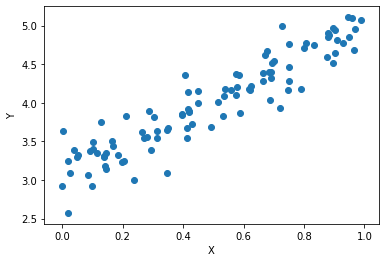

In [4]:
# Plot graph เพื่อดูความสัมพันธ์ของข้อมูล
plt.scatter(X, Y)
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [5]:
xy = [(x, y) for x, y in zip(X, Y)]
df = pd.DataFrame(xy)
df

,0,1
0,0.417022,3.912953
1,0.720324,3.935099
2,0.000114,2.923678
3,0.302333,3.811659
4,0.146756,3.351035
...,...,...
95,0.237027,2.999964
96,0.903380,4.645030
97,0.573679,4.372731
98,0.002870,3.637822


In [6]:
df.columns = ['carat', 'price_10k']
df

,carat,price_10k
0,0.417022,3.912953
1,0.720324,3.935099
2,0.000114,2.923678
3,0.302333,3.811659
4,0.146756,3.351035
...,...,...
95,0.237027,2.999964
96,0.903380,4.645030
97,0.573679,4.372731
98,0.002870,3.637822


In [7]:
# np.random.seed(1) # กำหนด random seed ไว้ เพื่อให้ได้ตัวเลขชุดเดิมเวลากลับมารันใหม่

# X1 = np.random.random(100) # สุ่มตัวเลขมา 100 ค่า จาก uniform distribution [0,1) 
# X2 = np.random.random(100)
# noise = np.random.randn(100) # สุ่มตัวเลขมา 100 ค่า จาก standard normal distribution (mean=0, std=1)

# tmp = 3*X1 + 3*X2 + 3
# Y = (X2 >= 0.6)

In [8]:
# tmp

In [9]:
# # Plot graph เพื่อดูความสัมพันธ์ของข้อมูล
# plt.scatter(X2,X1, c=Y)
# plt.xlabel('X1')
# plt.ylabel('X2')
# plt.show()

## Error Function

ref: zip() function  
https://www.w3schools.com/python/ref_func_zip.asp

In [10]:
# สร้าง function ที่ใช้วัด ค่า error ที่เกิดขึ้น 
# จากการใช้ สมการเส้นตรง Y_hat = w0 + w1*X  มาเทียบกับข้อมูล Y

def compute_mse(X, Y, w0, w1):
    # สร้างสมการเส้นตรงตามค่า w0, w1 ที่กำหนด
    Y_hat = w0 + w1*X

    # วน loop เพื่อคำนวณค่า error ที่เกิดขึ้นในทุกๆ data point
    # แล้วนำมารวมกันที่ ตัวแปร totol_error
    total_error = 0
    for y, y_hat in zip(Y, Y_hat):
        error = (y-y_hat)**2
        total_error += error 

    # คำนวณค่าเฉลี่ยของ error ที่เกิดขึ้น - หารด้วย 2m หรือ 2|X| 
    mse = total_error / (2 * len(X))

    return mse

### Test our error function

In [11]:
w0 = 10 #B0
w1 = 1 #B1
compute_mse(X, Y, w0, w1)
# it works

21.142299784375766

## Plot Error vs Weights

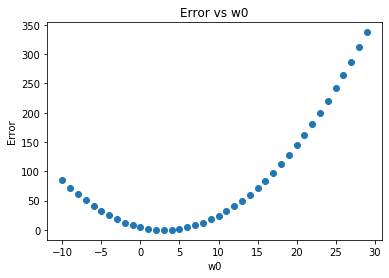

In [12]:
# ทำการสร้างกราฟของ Error เทียบ w0
w0_list = [] #intercept
error_list_by_w0 = []

w1 = 2 #slope

for w0 in range(-10, 30):
    error = compute_mse(X, Y, w0, w1) # Get the J(X) 
    error_list_by_w0.append(error)
    w0_list.append(w0)

    
plt.title('Error vs w0')
plt.scatter(w0_list, error_list_by_w0)
plt.ylabel('Error')
plt.xlabel('w0')
plt.show()

In [13]:
min(error_list_by_w0) #find min mse

0.025481252320472502

In [14]:
np.argmin(error_list_by_w0) #find index

13

In [15]:
w0_list[np.argmin(error_list_by_w0)] #B0

3

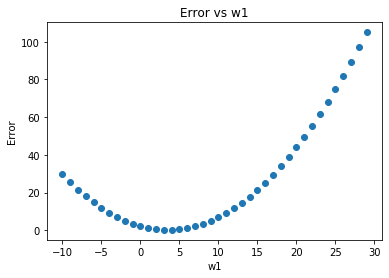

In [16]:
# ทำการสร้างกราฟของ Error เทียบ w1
w1_list = [] #slope
error_list_by_w1 = []

w0 = 2 #intercept

for w1 in range(-10,30):
    error = compute_mse(X, Y, w0, w1)
    error_list_by_w1.append(error)
    w1_list.append(w1)

plt.title('Error vs w1')
plt.scatter(w1_list, error_list_by_w1)
plt.ylabel('Error')
plt.xlabel('w1')
plt.show()

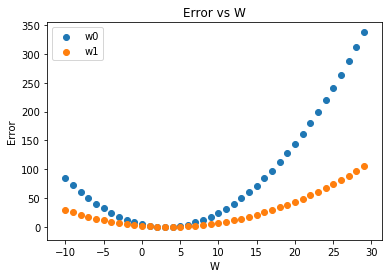

In [17]:
# Plot error เทียบกับ w0, w1 ลงในกราฟเดียวกัน
plt.title('Error vs W')
plt.scatter(w0_list, error_list_by_w0)
plt.scatter(w1_list, error_list_by_w1)
plt.ylabel('Error')
plt.xlabel('W')
plt.legend(['w0', 'w1'])
plt.show()

# Plot linear regression vs data points

In [18]:
def plot_line(X, Y, w0, w1, save_fig=False):
    X_dummy = np.linspace(0,1,10)
    Y_hat = w0 + w1*X_dummy

    error = compute_mse(X,Y, w0, w1)

    plt.scatter(X,Y)
    plt.plot(X_dummy, Y_hat, '-r')
    plt.ylim(0,np.max(Y)+1)
    plt.title(f'w0 = {np.round(w0, 5)} , w1 = {np.round(w1, 5)} \n error = {np.round(error, 5)}')

    if save_fig:
        plt.savefig('image.png')
        plt.close()
        return None

    plt.show()

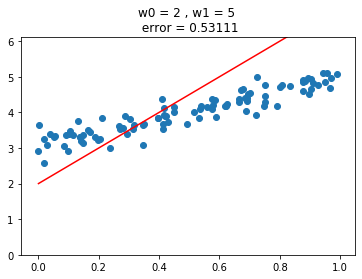

In [19]:
plot_line(X, Y, w0=2, w1=5)

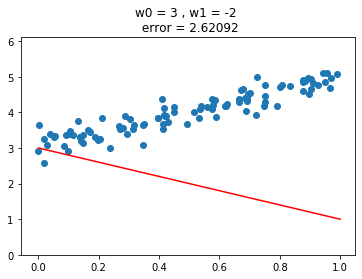

In [20]:
plot_line(X, Y, w0=3, w1=-2)

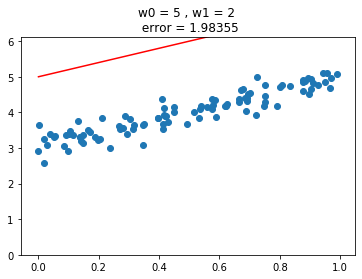

In [21]:
plot_line(X, Y, w0=5, w1=2)

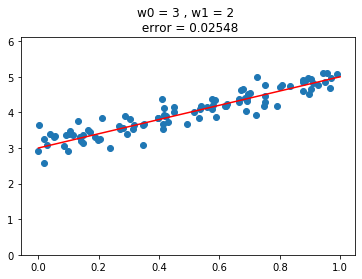

In [22]:
plot_line(X, Y, w0=3, w1=2)

# BatchGradeintDescent

In [23]:
def BatchGradeintDescent_Step(X, Y, w0, w1, lr):
    # สร้างสมการเส้นตรงตามค่า w0, w1 ที่กำหนด
    Y_hat = w0 + w1*X

    # สร้างตัวแปรที่ใช้เก็บ total gradient ของ w0 กับ w1
    total_dw0 = 0
    total_dw1 = 0

    # วน loop เพื่อทำการคำนวณค่า gradient (dw0, dw1) 
    # แล้วนำไปบวกเพิ่มในตัวแปร tottotal_dw0, total_dw1
    for x, y, y_hat in zip(X, Y, Y_hat):
        # คำนวนค่า delta (error ระหว่าง actual กับ prediction)
        delta = y - y_hat

        # คำนวณค่า gradient
        dw0 = delta * 1
        dw1 = delta * x

        # บวกเพิ่มในตัวแปร total gradient
        total_dw0 += dw0
        total_dw1 += dw1

    # หาค่าเฉลี่ยของ gradient
    avg_dw0 = (total_dw0) / len(X)
    avg_dw1 = (total_dw1) / len(X)

    # ทำการปรับค่า w0, w1 โดยใช้ค่าเฉลี่ยของ gradient
    w0 = w0 + lr * avg_dw0
    w1 = w1 + lr * avg_dw1

    return w0, w1

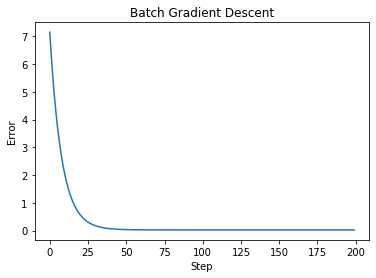

In [24]:
# กำหนดค่าเริ่มต้นของ w0, w1
w0 = 0
w1 = 0.5

# สร้างตัวแปรไว้สำหรับเก็บข้อมูล
w0_list = []
w1_list = []
error_list = []

# วน loop เพื่อทำปรับค่า w0, w1 โดยใช้วิธี Batch Gradient Descent
for i in range(200):
    # คำนวณค่า error ที่เกิดขึ้น เมื่อใช้ w0, w1  
    error = compute_mse(X, Y, w0, w1)

    # เก็บค่า w0, w1, error ไว้ใน list
    w0_list.append(w0)
    w1_list.append(w1)
    error_list.append(error)

    # ปรับค่า w0, w1 โดยใช้วิธี Batch Gradient Descent
    w0, w1 = BatchGradeintDescent_Step(X, Y, w0, w1, lr=0.05) 

# Plot error vs step
plt.title('Batch Gradient Descent')
plt.plot(error_list)
plt.ylabel('Error')
plt.xlabel('Step')
plt.show()

In [25]:
# สร้าง .gif เพื่อดูการเปลี่ยนแปลง ของ w0, w1, error
images = []

w0_list = w0_list
w1_list = w1_list

for i in tqdm(range(len(w0_list))):
    plot_line(X, Y, w0_list[i], w1_list[i], save_fig=True)

    images.append(imageio.imread('images/image.png'))

imageio.mimsave('images/Batch-GD.gif', images)

  0%|          | 0/200 [00:00<?, ?it/s]


FileNotFoundError: No such file: 'C:\Users\LAB203\Documents\GitHub\LabData4Biz63-1\Week8_Discriminant_functions\Week8_Discriminant_functions\practice\images\image.png'

# Stochastic Gradient Descent

In [26]:
def StochasticGradeintDescent_Step(X, Y, w0, w1, lr):
    # วน loop เพื่อทำการคำนวณค่า gradient (dw0, dw1) 
    # หลังจากนั้นทำการปรับค่า w0, w1 ตามค่า gradient ที่เกิดในในแต่ละ data point
    for x, y in zip(X, Y):
        # คำนวณค่า y_hat จาก w0, w1 ที่กำหนด
        y_hat = w0 + w1*x

        # คำนวณค่า delta (error ระหว่าง actual กับ prediction)
        delta = y - y_hat

        # คำนวณค่า gradient w0,w1 
        dw0 = delta * 1
        dw1 = delta * x

        # ปรับค่า w0, w1
        w0 = w0 + lr * dw0
        w1 = w1 + lr * dw1

    return w0, w1


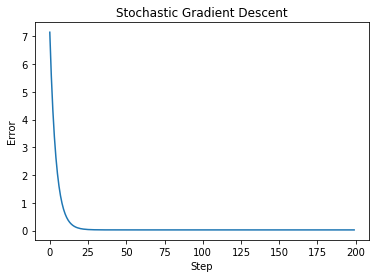

In [27]:
# กำหนดค่าเริ่มต้นของ w0, w1
w0 = 0
w1 = 0.5

# สร้างตัวแปรไว้สำหรับเก็บข้อมูล
w0_list2 = []
w1_list2 = []
error_list2 = []

# วน loop เพื่อทำปรับค่า w0, w1 โดยใช้วิธี Stochastic Gradient Descent
for i in range(200):
    # คำนวณค่า error ที่เกิดขึ้น เมื่อใช้ w0, w1  
    error = compute_mse(X, Y, w0, w1)

    # เก็บค่า w0,w1, error ไว้ใน list
    w0_list2.append(w0)
    w1_list2.append(w1)
    error_list2.append(error)

    # ปรับค่า w0, w1 โดยใช้วิธี Stochastic Gradient Descent
    w0, w1 = StochasticGradeintDescent_Step(X, Y, w0, w1, lr=0.001) 

# Plot error vs step
plt.title('Stochastic Gradient Descent')
plt.plot(error_list2)
plt.ylabel('Error')
plt.xlabel('Step')
plt.show()

In [28]:
# สร้าง .gif เพื่อดูการเปลี่ยนแปลง ของ w0, w1, error
images = []

w0_list = w0_list2
w1_list = w1_list2

for i in tqdm(range(len(w0_list))):
    plot_line(X, Y, w0_list[i], w1_list[i], save_fig=True)

    images.append(imageio.imread('images/image.png'))

imageio.mimsave('images/SGD.gif', images, )

  0%|          | 0/200 [00:00<?, ?it/s]


FileNotFoundError: No such file: 'C:\Users\LAB203\Documents\GitHub\LabData4Biz63-1\Week8_Discriminant_functions\Week8_Discriminant_functions\practice\images\image.png'

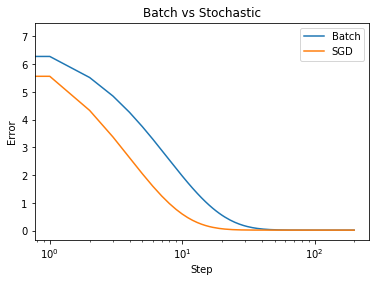

In [29]:
plt.title('Batch vs Stochastic')
plt.plot(error_list)
plt.plot(error_list2)
plt.ylabel('Error')
plt.xlabel('Step')
plt.legend(['Batch', 'SGD'])
plt.xscale('log')
plt.show()